###  Titanic_train.csv 파일을 data라는 변수에 불러오고, PassengerId를 index로 지정을 하시오!!!   
필요한 패키지는 numpy / pandas / matplolib.pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("02_EDA/02_example/titanic_train.csv", index_col = "PassengerId")

In [9]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* 받은 데이터의 간략적인 정보 확인하세요!!

In [5]:
#일단 받은 데이터에서 수치형 컬럼들의 값이 몇 개고 대략 범위가 어떻게 되는지 체크
#-> 범위가 다 다르면.. 정규화 작업을 해야겠다 고민
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 데이터들에서 NaN이 없는지 확인!!!

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


* 항목별로 이상한 데이터들의 비율을 계산하시오!!!

In [24]:
# 1) 불리언 인덱싱
col = "Age"
len(data[data[col].isnull()]) / len(data) # len으로 나누지 않으면 null 수를 알 수 있음

0.19865319865319866

In [26]:
#구멍난 데이터 찾기 : isnull, notnull
for col in data.columns:
    print(str(col)+":",data[col].isnull().sum()/len(data))

Survived: 0.0
Pclass: 0.0
Name: 0.0
Sex: 0.0
Age: 0.19865319865319866
SibSp: 0.0
Parch: 0.0
Ticket: 0.0
Fare: 0.0
Cabin: 0.7710437710437711
Embarked: 0.002244668911335578


#### 참고 : 데이터 항목 설명[ surveved : 생존여부(0/1), Pclass : 티켓의 클래스(1은 1st, 2는 2nd ..), name : 승객이름, sex : 승객성별, Age : 승객나이, SibSp : 함께 탑승한 형재와 배우자의 수, parch : 함께 탑승한 부모, 아이의 수, ticket: 티켓번호, Fare: 탑승료, cabin : 객실번호, embarked :탑승항구(C:Cherboug, Q :Queenstown, S:south ampton)] 

* 탑승항구가 Cherboug 이면서, 탑승료를 200 초과로 지불한 사람들에 대한 데이터를 추리고, head로 앞에 불러서 확인!

In [31]:
#data[조건1, 조건2 ...] -> 불리언 인덱싱
#여기서는 간단히 [컬럼]으로 loc계열 대신 사용
data[(data["Embarked"] =="C") & (data["Fare"]>200)].head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C


In [32]:
len(data[ (data["Embarked"] =="C") & (data["Fare"]>200)])

12

* 위의 조건에(항구/요금) 해당하는 것들을 요금에 대한 기준으로 정리를 하세요(요금이 높은 사람부터 낮은 사람 순서대로.)

In [48]:
data[(data["Embarked"] =="C") & (data["Fare"]>200)].sort_values(by = "Fare", ascending = False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


* 나이에 대항 카테고리를 정리하는 함수를 만들고(기준은 30미만은 1, 30이상~55미만은 2, 그 이상은 3으로 코딩)하는 함수 만들기.

In [56]:
#람다 함수에 조건문 사용시 특이사항 : if/ else 
#lambda x : i1값 if 조건 else el값
#lambda x : i1값 if 조건 else (i2 if 조건2 else ~~) 많은 조건은 함수를 만들어서 쓰는게 더 편함

In [54]:
#입력 : 나이 숫자 값
#출력 : 구분해서 1,2,3 중 하나의 값으로 출력
def age_category(age):
        if age < 30:
             return 1
        elif age < 55:
             return 2
        else:
             return 3

In [ ]:
#방법1) lambda & if
data["Age"].apply(lambda x : 1 if x < 30 else (2 if x < 50 else 3))

In [ ]:
#방법2) lambda & 내가 만든 함수
data["Age"].apply(lambda x :age_category)

In [ ]:
#방법3) 내가 만든 함수 
data["Age"].apply(age_category)

In [57]:
#방법4) 리스트 컴프리핸션 & 내가 만든 함수
age_cat = [age_category(age) for age in data.Age]
#data["Age"] = age_cat #data에 업로드하기

* 위의 나이를 분류하는 함수를 바탕으로 Age_catogory하는 컬럼을 만들어서 생성하시오!!!

In [58]:
data["Age"].value_counts()

1    384
2    288
3    219
Name: Age, dtype: int64

* 성별이 남성, 성별이 여성인 사람들의 각각 전체 수는?

In [62]:
# 카테고리 변수(남성, 여성->) : 무슨 종류가 몇개?
# -> value_counts()
(data["Sex"] == "male").sum(), (data["Sex"] == "female").sum()

(577, 314)

In [65]:
data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* 성별에 대해서 남성/여성이 어떻게 분포하는지 확인

<AxesSubplot:title={'center':'F/M Counts'}>

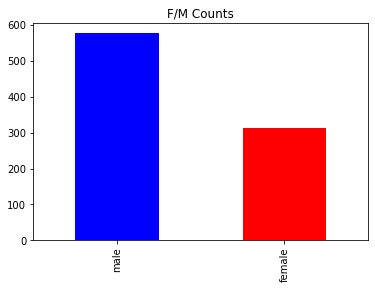

In [69]:
data["Sex"].value_counts().plot(kind="bar", title="F/M Counts", color=["b","r"])

* 선실 등급 별로 성별이 어떻게 분포하는지 확인

In [80]:
pd.pivot_table(data, index = ["Pclass"], values = ["Fare"], columns = ["Sex"], aggfunc="count", margins = True)

Fare          
Sex    female male  All
Pclass                 
1          94  122  216
2          76  108  184
3         144  347  491
All       314  577  891

In [82]:
pd.crosstab(data["Pclass"], data["Sex"])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


* crosstab 에서도 아래와 같이 꾸밀 수 있음!!

In [85]:
pd.crosstab(data["Pclass"], data["Sex"]).style.background_gradient(cmap = "summer_r")

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


* 아래 그림과 같이 Pclass에 대한 히스토그램을 그리는데, 남자/여자/전체에 대해서 나타날 수 있도록 그리시오.

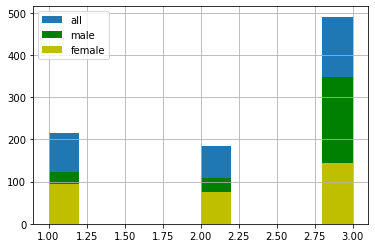

In [97]:
data["Pclass"].hist(label = "all")
data[data["Sex"] == "male"]["Pclass"].hist(color = "g", label="male")
data[data["Sex"] == "female"]["Pclass"].hist(color = "y", label="female") #뒤에 숫자가 작다면 묻힐 수 있음(alpha 같은 투명도 이용)
plt.legend(loc=2)

* 요금(fare)에 대한 평균/ 중앙값(median)/표준편차를 구해보시오.

In [12]:
round(12345.67891234,3)

12345.679

In [88]:
round(data["Fare"].median(),1)

14.5

In [90]:
round(data["Fare"].mean(),1)

32.2

In [ ]:
#유사한 친구들의 요금들을 바탕으로 추정하는 경우

* 아래 그래프와 같이 생존 여부에 대한 나이별로 그래프를 나타내보시오!

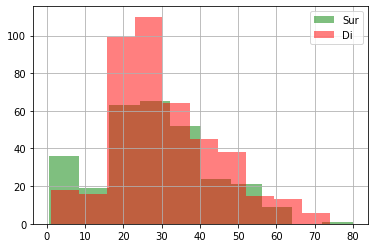

In [117]:
data[data["Survived"]==1]["Age"].hist(color="g", label="Sur", alpha = 0.5)
data[data["Survived"]==0]["Age"].hist(color="r", label="Di", alpha = 0.5)
plt.legend(loc=1)

* seaborn 패키지를 로드하세요.

In [3]:
import seaborn as sns
sns.set()

* 아래 그림과 같이 생존 여부에 대한 나이별로 boxplot를 그려보세요.

In [ ]:
#seaborn의 기본스타일 중 하나가 가로에는 x, 세로에는 y, 구별해서 보려면 hue

<AxesSubplot:xlabel='Survived', ylabel='Age'>

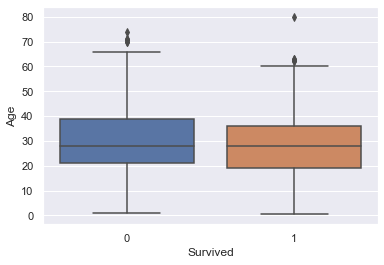

In [6]:
#방법1) 가로, 세로에 직접적으로 값을 밀어넣는 방식
sns.boxplot(x = data["Survived"], y = data["Age"])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

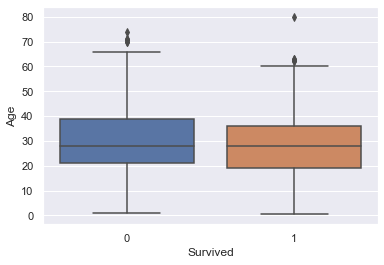

In [7]:
#방법2) 어느 데이터 프레임에서 가로는 뭔 컬럼, 세로는 뭔 컬럼
# -> 데이터를 지정했으니 가로/세로 컬럼 이름만 쓰자
sns.boxplot(data = data, x = "Survived", y = "Age")

* 생존자한 사람들의 나이 평균, 생존하지 못한 사람들의 나이 평균을 구하세요.

In [8]:
#groupby해도 결과는 DF처럼
data.groupby(by = ["Survived"])["Age"].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

* 위의 결과들을 보고, 본인만의 기준을 가지고 (젊은 생존자의 구분 : 예 30, 나이든 생존자의 구분: 예60)이런 식으로 구분을 하고, 각기 전체에서 얼마나 차지하는지 비율을 계산해보세요..

In [10]:
young_survived = data.loc[data["Age"]< 30, "Survived"]
old_survived = data.loc[data["Age"]>60, "Survived"]
print("젊은 생존자 :", round(100*young_survived.mean()), 1)
print("고령 생존자 :", round(100*old_survived.mean()), 1)

젊은 생존자 : 41 1
고령 생존자 : 23 1


* 남성 중에서 생존자들과, 여성 중에서 생존자들에 대한 것을 가지고 각기 평균 비율을 구하시오.

In [12]:
data.groupby(by="Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
male_survived = data.loc[data["Sex"]=="male", "Survived"]
female_survived = data.loc[data["Sex"]=="female", "Survived"]
print("남성 생존자 :",round(100*male_survived.mean()),1)
print("여성 생존자 :", round(100*female_survived.mean()),1)

남성 생존자 : 19 1
여성 생존자 : 74 1


* 이름 컬럼에 대한 head()를 보이세요.

In [14]:
data["Name"].head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

* 1번 사람의 이름을 , 를 구분하여 분리해서,.  first name만 나타내보세요.

In [21]:
data.loc[1,"Name"].split(",")[1].split()[1]

'Owen'

* first_names 라는 변수를 만들어서 성별이 남자인 사람들의 firstname을 구하고, 각기  firstname별로 얼마나 많이 나타나는지 확인하세요.

In [28]:
# 1)전체가아니고 성별이 남자인 경우
# 2)내가 보고자하는 컬럼은 이름
# 3)first name만 보고싶다
# 4)동일한 first_name들이 몇 명이 있는지 보자

first_name = data.loc[data["Sex"] =="male", "Name"].apply(lambda full_name:
        full_name.split(",")[1].split()[1]
        )
first_name.value_counts().head()

William    35
John       25
George     14
Charles    13
Thomas     13
Name: Name, dtype: int64

* 각 등급별로 남성/여성의 평균 나이를 계산해서 나타내시오..

In [62]:
#ME
dat_m = data.loc[data["Sex"]=="male",["Age","Pclass"]]
dat_f = data.loc[data["Sex"]=="male",["Age","Pclass"]]
print("평균나이 : male // 객실등급 1: "+str(dat_m.loc[dat_m["Pclass"]==1,"Age"].mean()))
print("평균나이 : female // 객실등급 1: "+str(dat_f.loc[dat_f["Pclass"]==1,"Age"].mean()))
print("평균나이 : male // 객실등급 2: "+str(dat_m.loc[dat_m["Pclass"]==2,"Age"].mean()))
print("평균나이 : female // 객실등급 2: "+str(dat_f.loc[dat_f["Pclass"]==2,"Age"].mean()))
print("평균나이 : male // 객실등급 3: "+str(dat_m.loc[dat_m["Pclass"]==3,"Age"].mean()))
print("평균나이 : female // 객실등급 3: "+str(dat_f.loc[dat_f["Pclass"]==3,"Age"].mean()))

평균나이 : male // 객실등급 1: 41.28138613861386
평균나이 : female // 객실등급 1: 41.28138613861386
평균나이 : male // 객실등급 2: 30.74070707070707
평균나이 : female // 객실등급 2: 30.74070707070707
평균나이 : male // 객실등급 3: 26.507588932806325
평균나이 : female // 객실등급 3: 26.507588932806325


In [67]:
for cl in data["Pclass"].unique():
    for sex in data["Sex"].unique():
        print("평균나이: {0} &  객실등급 {1}:{2}".format(
            sex, cl, round(data[(data["Sex"]==sex)
            & (data["Pclass"]==cl)]["Age"].mean(), 2)
        ))

평균나이: male &  객실등급 3:26.51
평균나이: female &  객실등급 3:21.75
평균나이: male &  객실등급 1:41.28
평균나이: female &  객실등급 1:34.61
평균나이: male &  객실등급 2:30.74
평균나이: female &  객실등급 2:28.72


In [69]:
for(cl,sex), sub_df in data.groupby(by=["Pclass","Sex"]):
    print("평균나이 : 성별{0}&객실{1} -> {2}".format(
        sex, cl, round(sub_df["Age"].mean(),2)
    ))

평균나이 : 성별female&객실1 -> 34.61
평균나이 : 성별male&객실1 -> 41.28
평균나이 : 성별female&객실2 -> 28.72
평균나이 : 성별male&객실2 -> 30.74
평균나이 : 성별female&객실3 -> 21.75
평균나이 : 성별male&객실3 -> 26.51


* 등급별로 성별에 대한 나이 평균을 표로 만드세요.

In [63]:
pd.crosstab(data["Pclass"], data["Sex"], values=data["Age"], aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


* 위의 그래프는 boxplot으로 나타내시오

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

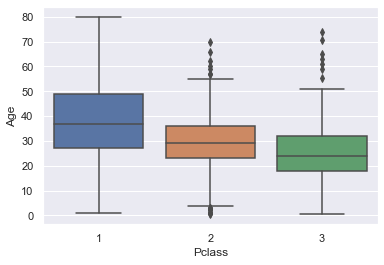

In [70]:
sns.boxplot(data=data, x="Pclass", y = "Age")

* 정보를 보면 cabin에 대해서는 정보가 많이 부족하기에, 이 항목은 제거.

In [71]:
#pandas에서 지우는 것이 drop -> 가로, 세로
# 빈 값에 대해서 지울 때 : dropna
#dropna() : 특별히 조건 지정하지 않으면, 가로줄을 기준으로 모든 값이 있는 데이터만 살린다 
           #-> 완벽하게 complete한 셋을 자동 구성 -> 데이터의 수가 확 줄어들 수 있음
data = data.drop("Cabin", axis =1).dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Name      712 non-null    object 
 3   Sex       712 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     712 non-null    int64  
 6   Parch     712 non-null    int64  
 7   Ticket    712 non-null    object 
 8   Fare      712 non-null    float64
 9   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 61.2+ KB


* survived/Age/Fare/SibSp/Parch에 대한 pairplot 그려보기

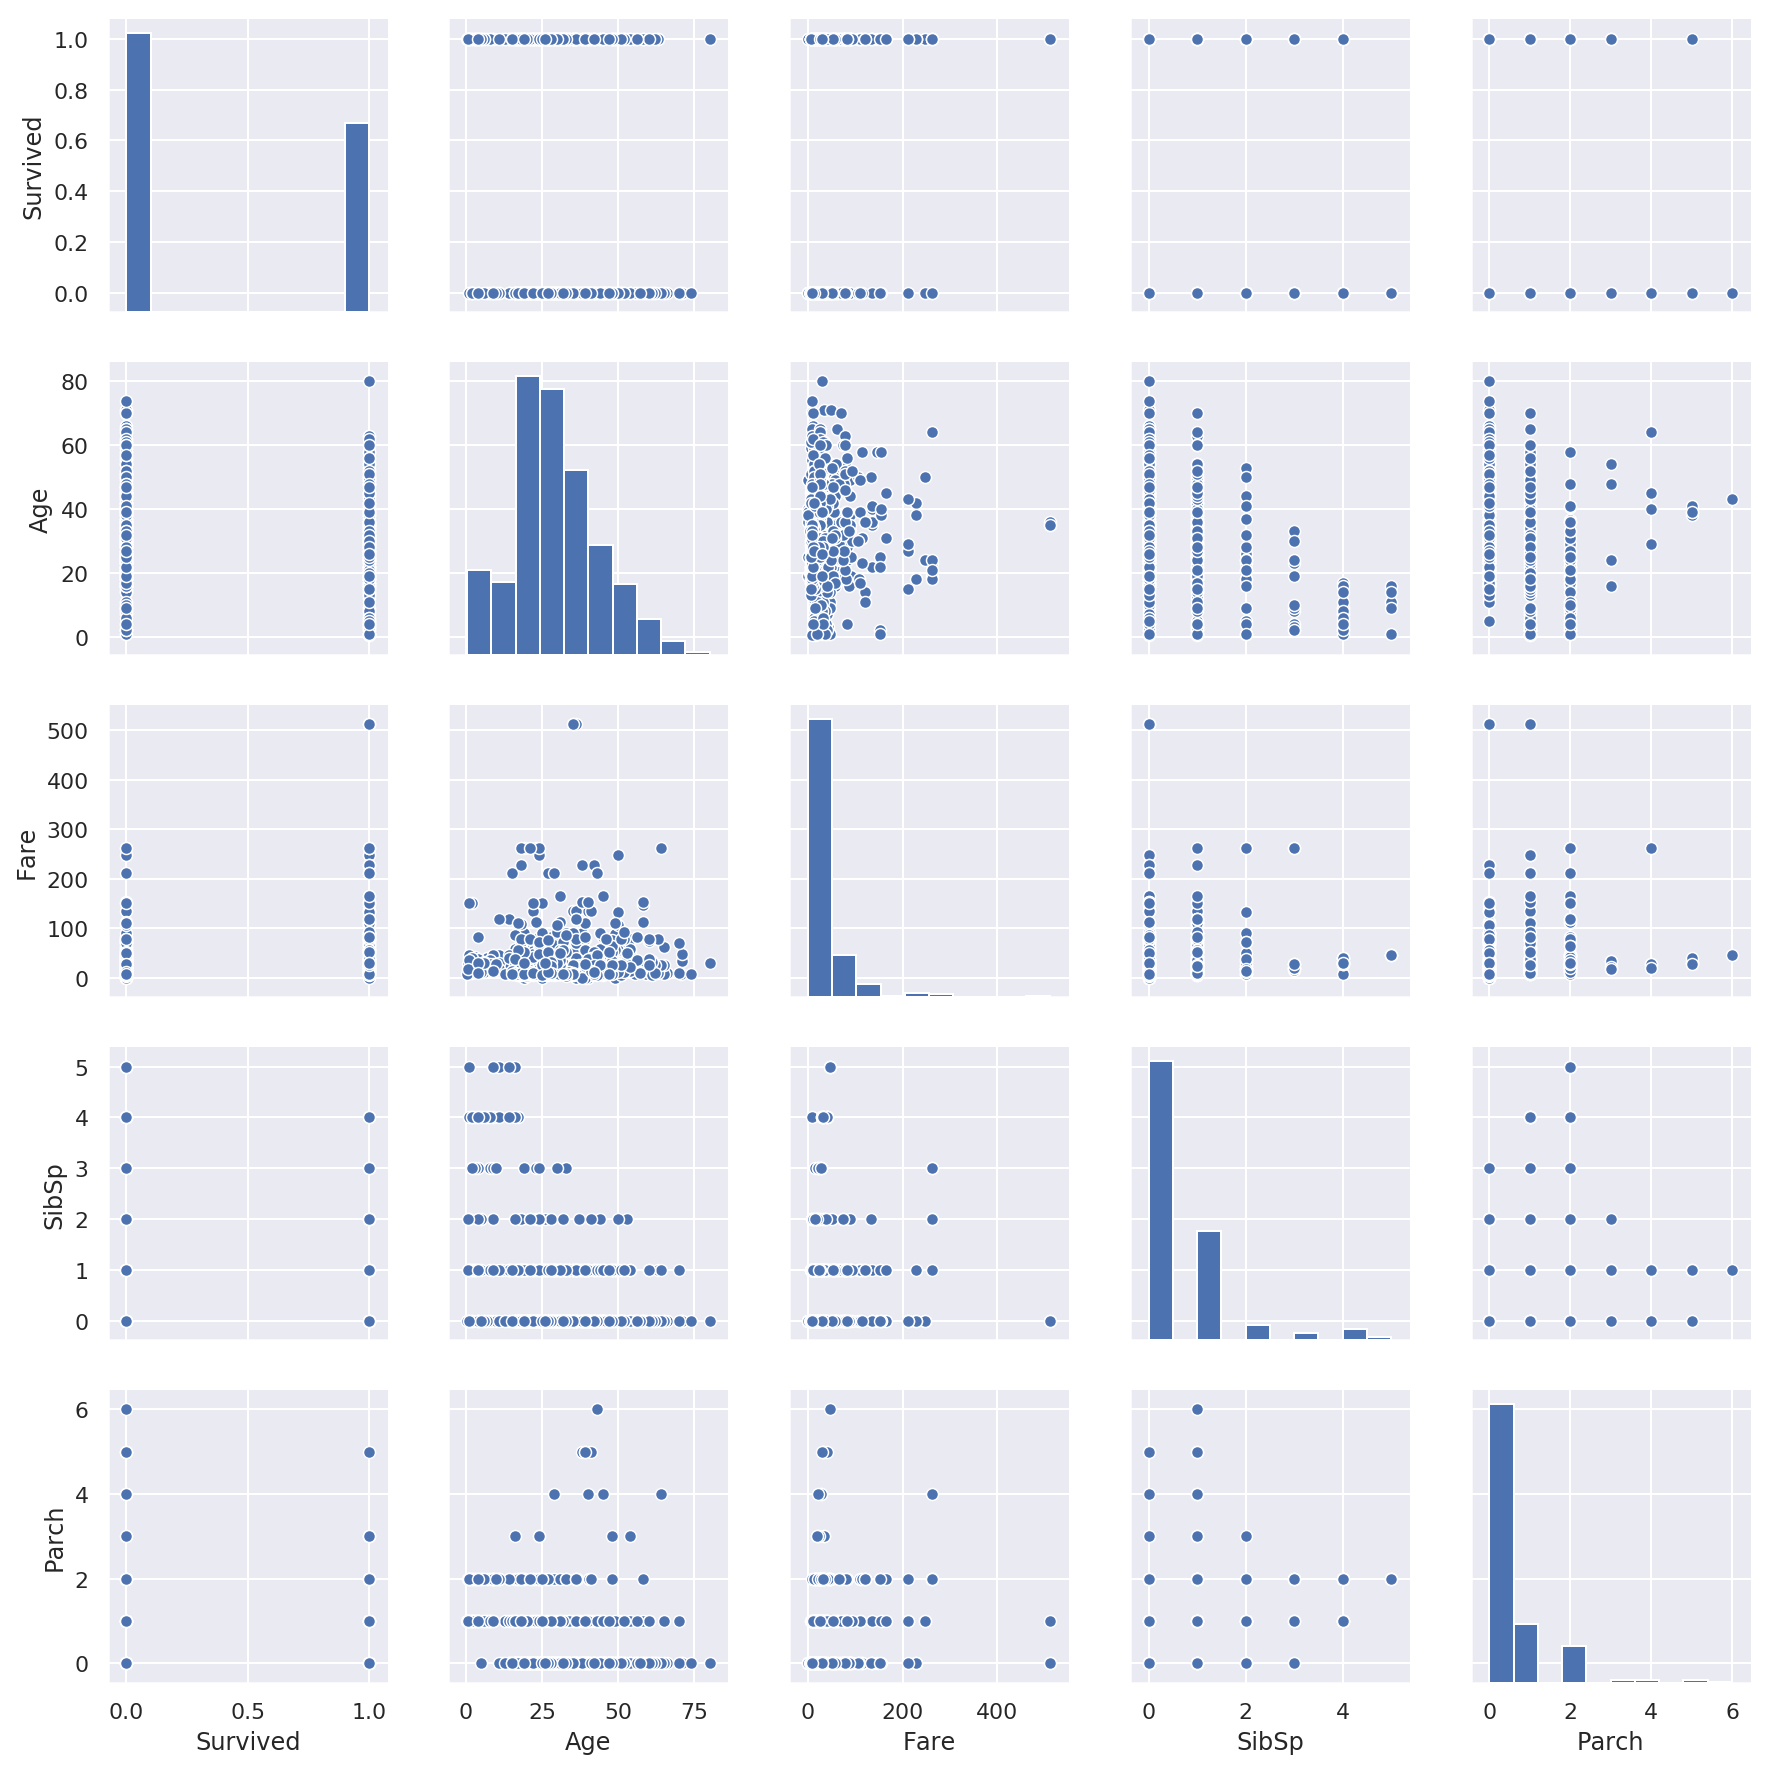

* Pclass, Fare에 대한 boxplot를 그려보시오!

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

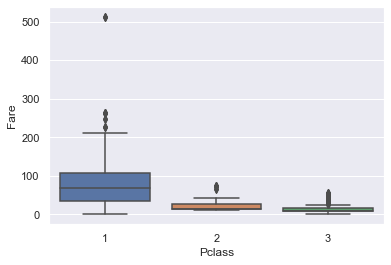

In [72]:
sns.boxplot(data = data, x="Pclass", y = "Fare")

* 위의 그래프를 보고, 원본 데이터에 대해서 이상한 아웃라이어를 제거하고 싶음. 그 기준은 0.95 인 quantile에 대한 값으로..수정을 해보자...

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

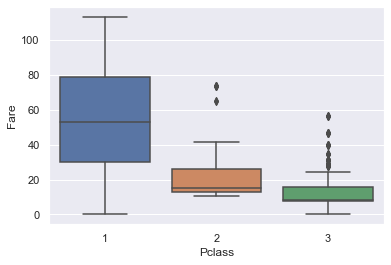

In [73]:
#그래프를 그릴 때, 대상이 꼭 원본 DF일 필요는 없다
#-> 내가 원하는 것들만 추린 DF에서 그릴 수 있다
sns.boxplot( x="Pclass", y = "Fare",data = data[data["Fare"]< data["Fare"].quantile(0.95)])

* Pclass별로 생존 여부 확인 --> 안 좋은 사실이 발견이 됨;;;ㅠㅠ

<AxesSubplot:xlabel='Pclass'>

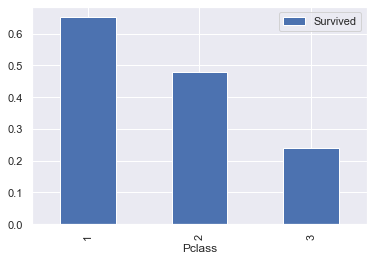

In [75]:
data.loc[:,["Pclass","Survived"]].groupby(by="Pclass").mean().sort_values(by = "Survived",ascending=False).plot(kind="bar")
#data.groupby(by="Pclass")["Survived"]로 해도 됨

<AxesSubplot:xlabel='Pclass'>

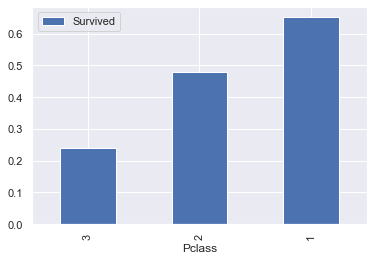

In [76]:
data.loc[:,["Pclass","Survived"]].groupby(by="Pclass").mean().sort_values(by = "Survived",ascending=True).plot(kind="bar")

Text(0.5, 1.0, 'Pclass : Survived vs Death')

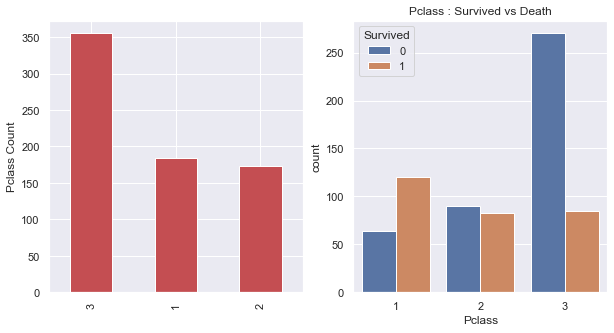

In [80]:
#그릴 영역을 나눠놓고, 각각 그래프를 그린 후에 어느 영역에 그릴지 ax로 표시
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,5))
data["Pclass"].value_counts().plot(kind="bar", color = "r", ax = axes[0])
axes[0].set_ylabel("Pclass Count")
sns.countplot(data=data, x = "Pclass", hue = "Survived",ax=axes[1])
axes[1].set_title("Pclass : Survived vs Death")

In [77]:
data["Pclass"].value_counts() #자동 내림차순으로 정렬해줌

3    355
1    184
2    173
Name: Pclass, dtype: int64

In [1]:
import h5py

In [4]:
f=h5py.File("/Users/minkyukwon/Desktop/2020_1_2/50_DataExploration/03_titanic/TRAAAAW128F429D538.h5","r")

In [5]:
f.keys()

<KeysViewHDF5 ['analysis', 'metadata', 'musicbrainz']>

In [8]:
list(f.keys())[0]

'analysis'

In [10]:
list(f[list(f.keys())[0]])

['bars_confidence',
 'bars_start',
 'beats_confidence',
 'beats_start',
 'sections_confidence',
 'sections_start',
 'segments_confidence',
 'segments_loudness_max',
 'segments_loudness_max_time',
 'segments_loudness_start',
 'segments_pitches',
 'segments_start',
 'segments_timbre',
 'songs',
 'tatums_confidence',
 'tatums_start']